# Earthquake

In [1]:
import numpy as np           
import pandas as pd               
import matplotlib.pyplot as plt  
import seaborn as sns             


import warnings                    ## Filter warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset 
df = pd.read_csv('earthquake_data.csv')
df.head(5)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.00,22-11-2022 02:03,8,7,green,1,768,us,117,0.51,17.00,mww,14.00,-9.80,159.60,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.90,18-11-2022 13:37,4,4,green,0,735,us,99,2.23,34.00,mww,25.00,-4.96,100.74,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.00,12-11-2022 07:09,3,3,green,1,755,us,147,3.12,18.00,mww,579.00,-20.05,-178.35,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.30,11-11-2022 10:48,5,5,green,1,833,us,149,1.86,21.00,mww,37.00,-19.29,-172.13,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.60,09-11-2022 10:14,0,2,green,1,670,us,131,5.00,27.00,mww,624.46,-25.59,178.28,NaN,NaN,NaN


In [3]:
#Check the dataset for & missing values and shape and duplicates

print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 782
Number of features (columns) in the dataset are: 19
Number of duplicate entries in the dataset are: 0
Number missing values in the dataset are: 1246


In [4]:
# Let's find out which features have null values
df.isnull().sum()[df.isnull().sum() > 0]

alert        367
location       5
continent    576
country      298
dtype: int64

In [5]:
#dataframe with info() and describe() functions

print('--'*40)
print(df.info())
print('--'*40, '\n', df.describe(include='all').T)
print('--'*40)

--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country  

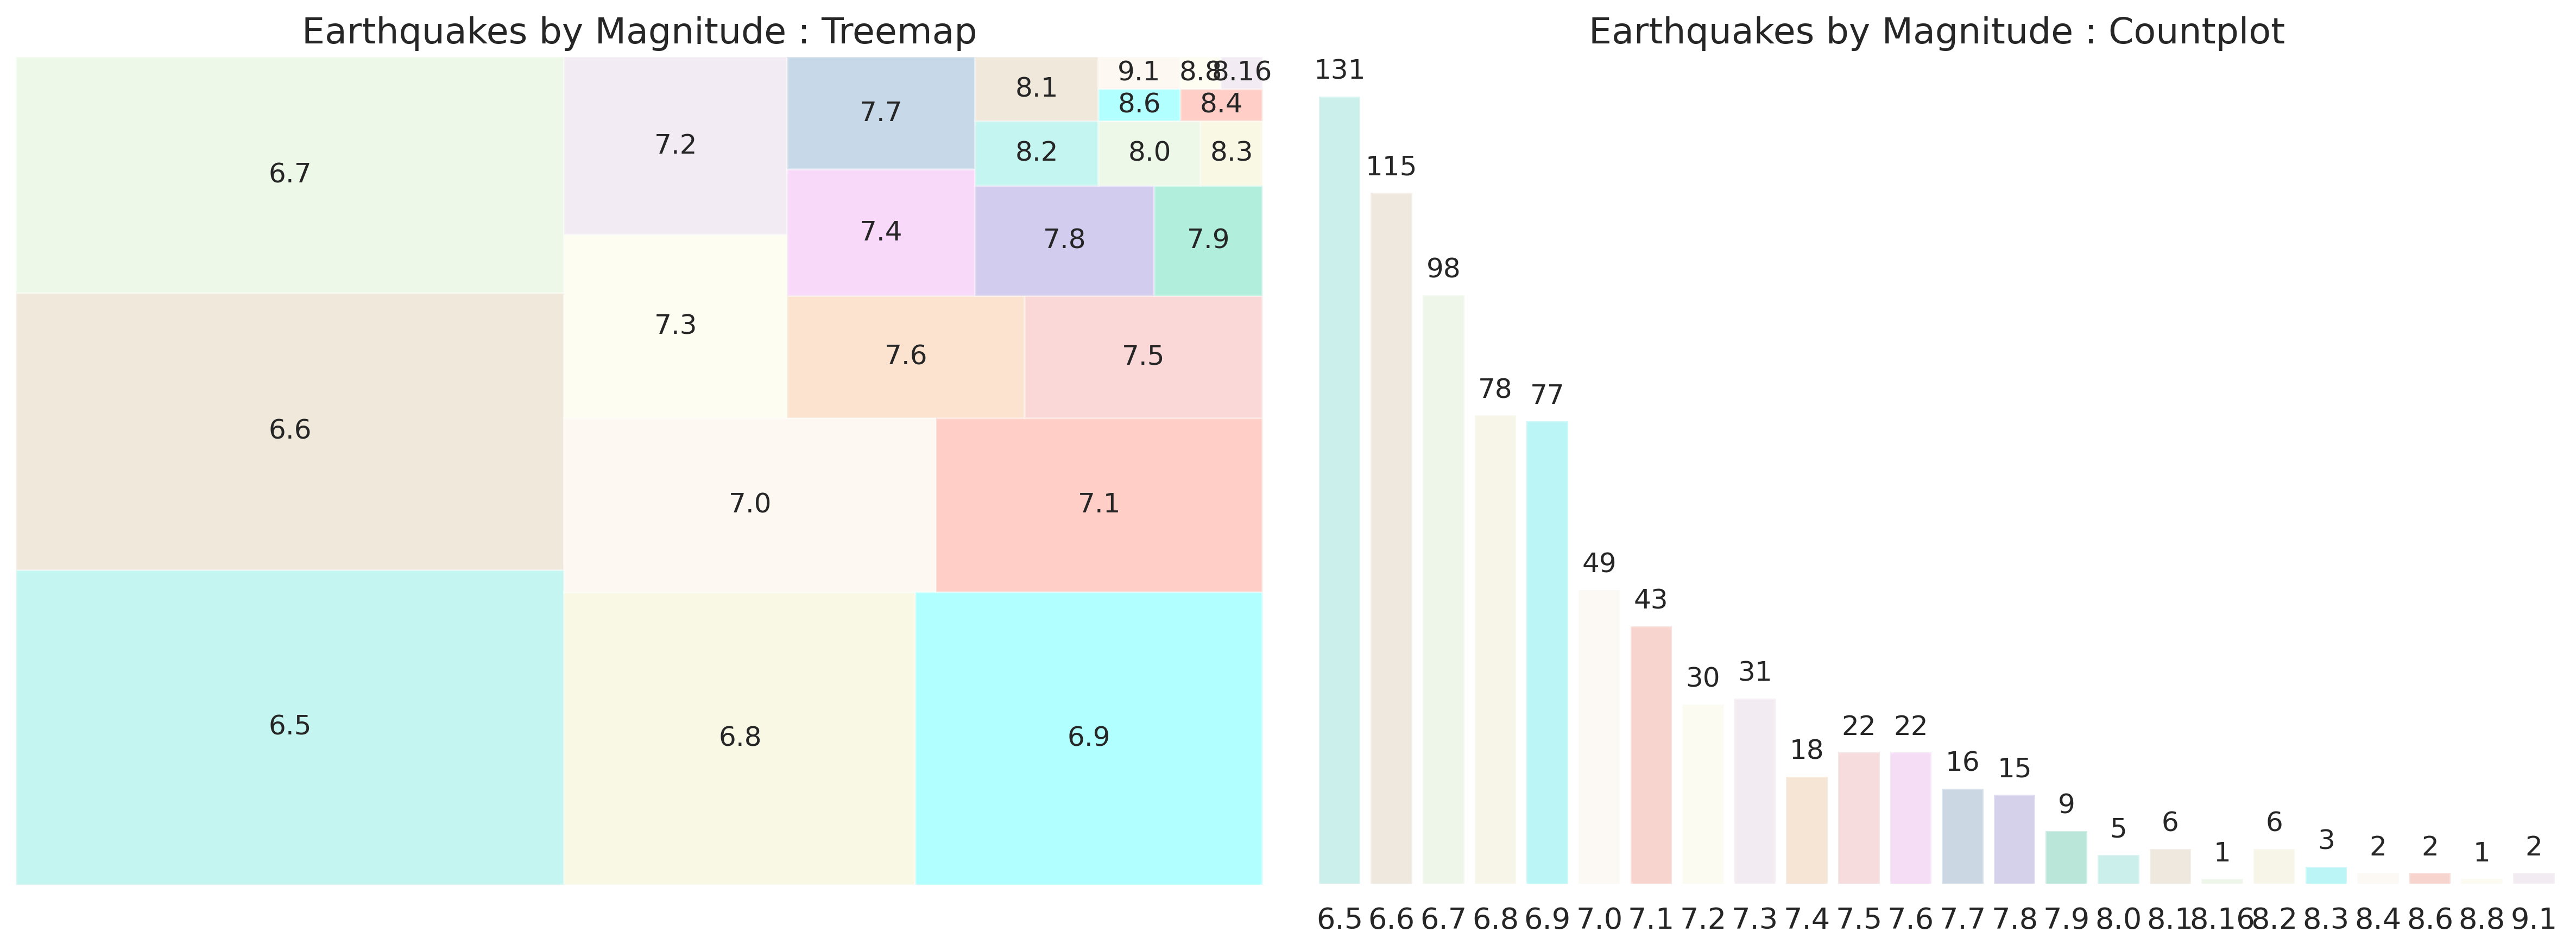

In [6]:
## Let's visualise the Earthquakes by Magnitude, to understand it in a better way

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':13,'ytick.labelsize':13, 'figure.autolayout':True, 'figure.dpi':300, 'savefig.dpi':300})
my_col = ('#40E0D0', '#D2B48C','#c7e9b4', '#EEE8AA','#00FFFF','#FAEBD7','#FF6347', '#FAFAD2', '#D8BFD8','#F4A460','#F08080', '#EE82EE', '#4682B4','#6A5ACD', '#00C78C')

plt.subplots(figsize=(16,6))

plt.subplot(1,2,1)

plt.title('Earthquakes by Magnitude : Treemap',fontsize=16)
labels = df['magnitude'].value_counts().index.get_level_values(0).tolist()
sizes = df['magnitude'].value_counts().reset_index().magnitude.values.tolist()

squarify.plot(sizes=sizes, label=labels, color=my_col, alpha=0.3)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Earthquakes by Magnitude : Countplot', fontsize=16)
ax = sns.countplot(x='magnitude', data=df, palette=my_col, alpha=0.3)
for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 2), ha='center', va='bottom')
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)
        
plt.show()

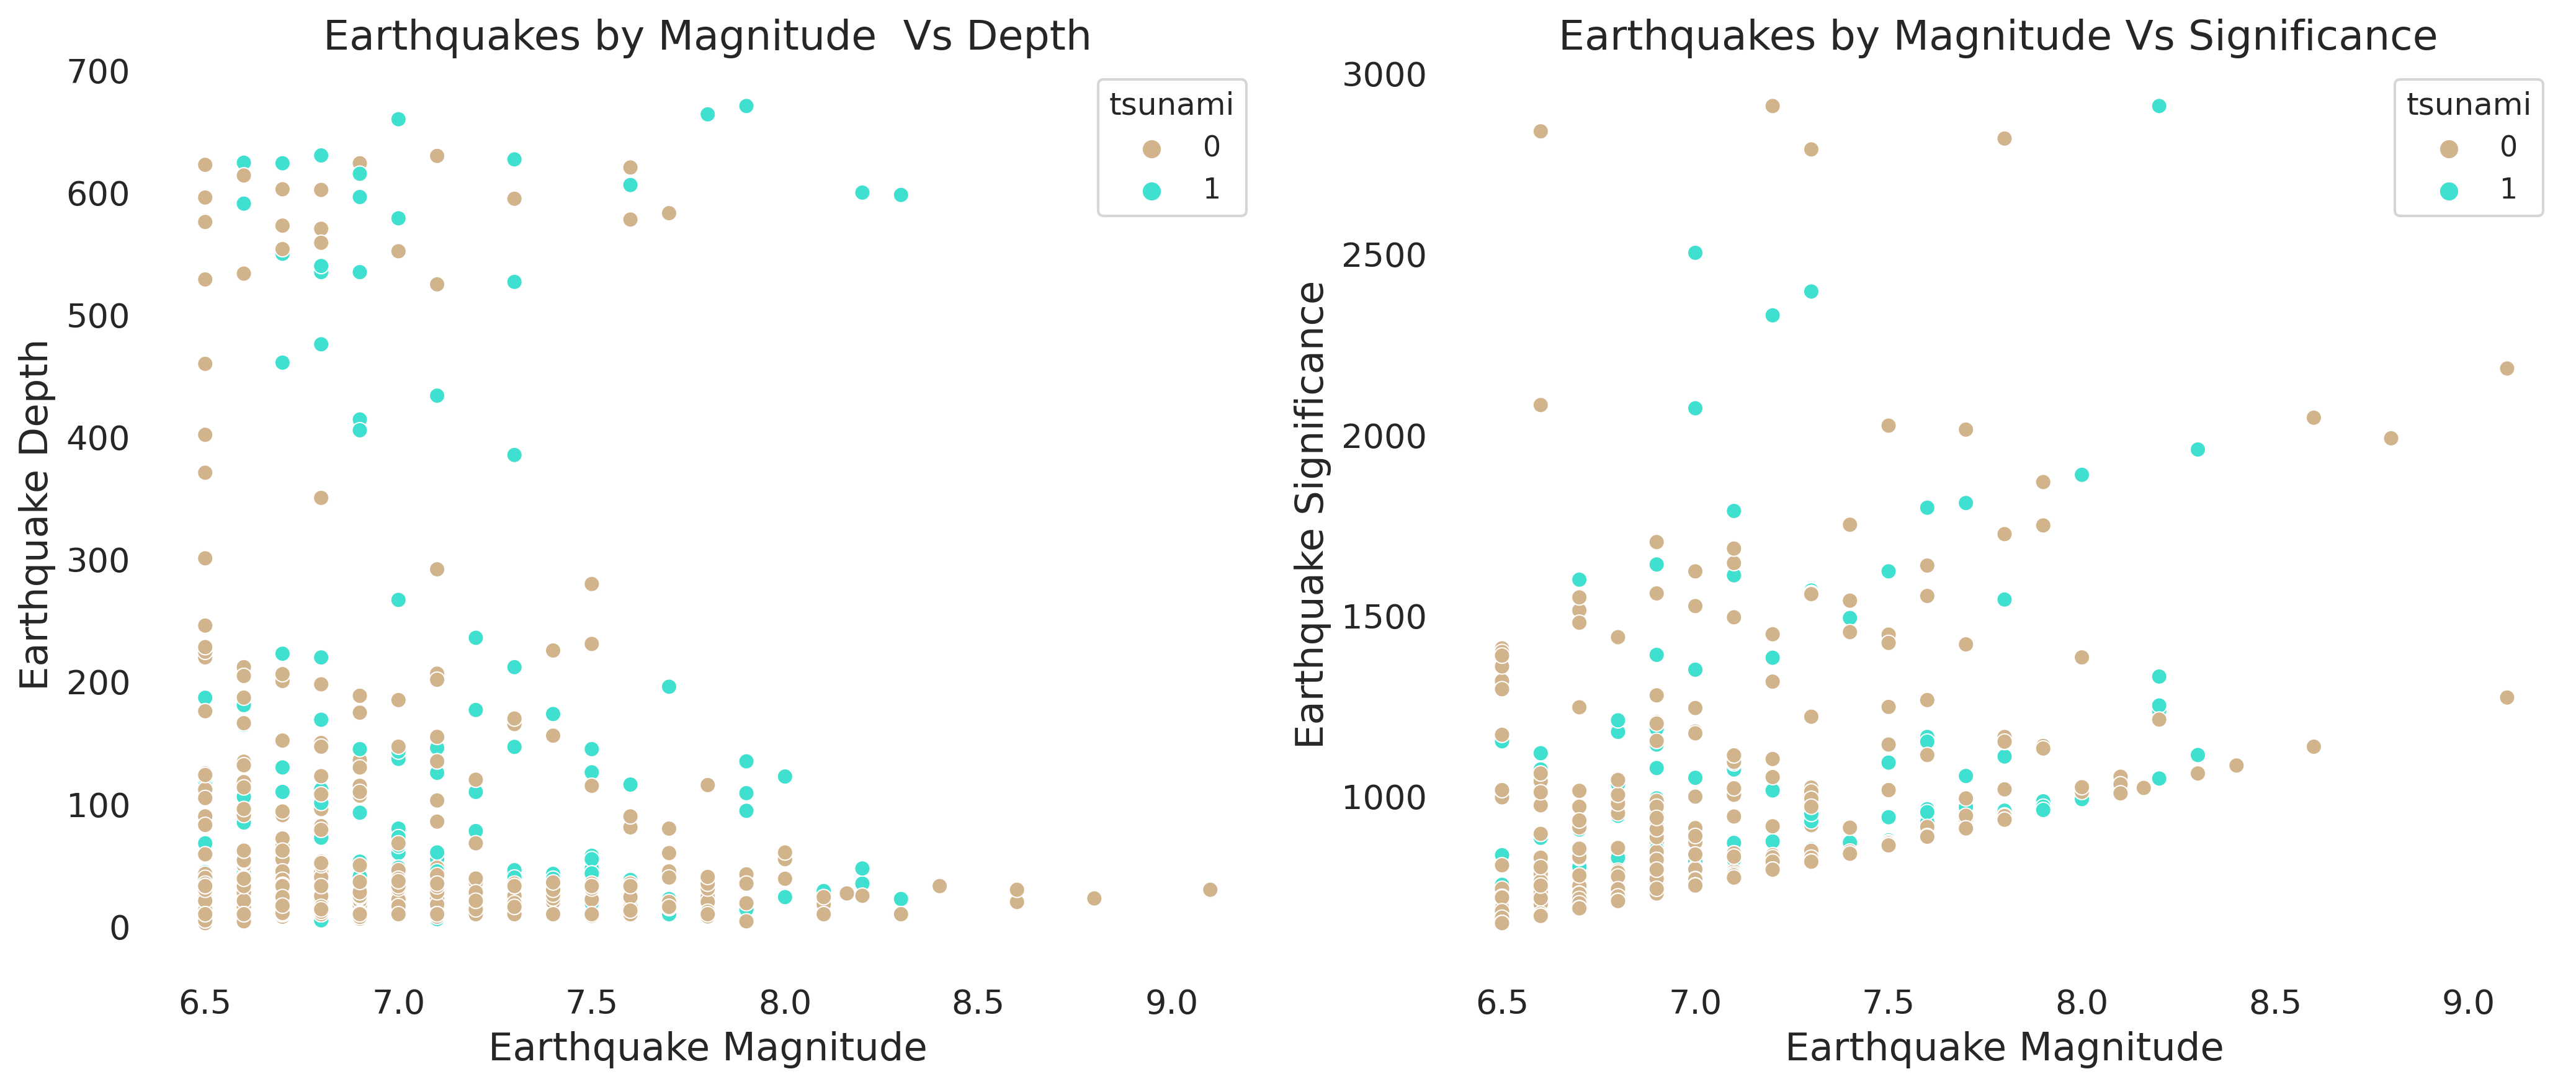

In [8]:
## Let's understand the relationship between magnitude vs depth and magnitude vs Significance

plt.subplots(figsize=(14,6))
my_pal = ('#D2B48C','#40E0D0')
          
plt.subplot(1,2,1)
plt.title('Earthquakes by Magnitude  Vs Depth',fontsize=16)
sns.scatterplot(data=df, x='magnitude', y='depth', hue='tsunami', palette=my_pal)
plt.ylabel('Earthquake Depth', fontsize=15)
plt.xlabel('Earthquake Magnitude', fontsize=15)

plt.subplot(1,2,2)
plt.title('Earthquakes by Magnitude Vs Significance ',fontsize=16)
sns.scatterplot(data=df, x='magnitude', y='sig', hue='tsunami', palette=my_pal)
plt.ylabel('Earthquake Significance', fontsize=15)
plt.xlabel('Earthquake Magnitude', fontsize=15)

plt.show()

In [17]:
# Making a fresh dataframe by droping null values from 'country','location','continent' columns
df_country=df.dropna(subset=['country','location','continent'], how='all')
print('\n', 'Missing values in the country column are : ', df_country['country'].isnull().sum())


 Missing values in the country column are :  42


In [18]:
# Now we check the missing values in location column, and label them as 'unknown'
print('\n', 'Missing location values Before : ', df_country['location'].isnull().sum())
df_country['location']=df_country['location'].fillna('unknown')
print('\n', 'Missing location values After  : ', df_country['location'].isnull().sum())


 Missing location values Before :  2

 Missing location values After  :  0


In [19]:
df_country['country'] = df_country['country'].fillna(df_country['location'])

# Check the null values in country column
df_country['country'].isnull().sum()

0